# Transposition, a bio-inspired operator

This notebook is based on the algorithms stored in `evol_algorithm.py` file.

## Evolutionary Algorithm

We run an evolutionary algorithm and evaluate the performance for two different recombination operator: Uniform Crossover and Transposition.

In [1]:
from evol_algorithm import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Runs

We use three different functions to test our algorithm.

For some parameters we use the same value for all the runs, so we define them before running the evolutionary algorithms. Furthermore we use the same population for every run.

**PARAMETERS:**

In [4]:
numb_runs = 30
numb_generations = 500
size_pop = 100
prob_mut = 0.02
prob_cross = 0.7
tour_size = 3
elite_percent = 0.02
dimensions = 20
precision = 3

## RASTIRIGIN

In [3]:
# problem dependent parameters
max_domain = 5.12
filename = 'rastrigin_crossover'
fitness = fit_rastrigin(dimensions, precision)
mutation = muta_bin(max_domain, dimensions, precision)

'''
Return population from file
'''

pop_init = read_init_pop('init_pop_rastrigin.dat')

**CROSSOVER**

We first define the problem dependent parameters and generate the initial population in order to have the same initial conditions.

In [6]:
%%time

recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
run_file(filename, numb_runs, numb_generations, pop_init, size_pop, prob_mut,
         tour_sel(tour_size), recombination, mutation, sel_survivors_elite(elite_percent), fitness)

CPU times: user 2.96 s, sys: 97.4 ms, total: 3.06 s
Wall time: 3.41 s


**TRANSPOSITION**

In [5]:
%%time

flank_size = [6]

for f_s in flank_size:
    filename = 'rastrigin_transposition_'+str(f_s)
    recombination = transposition(f_s)
    run_file(filename, numb_runs, numb_generations, pop_init, size_pop, prob_mut,
         tour_sel(tour_size), recombination, mutation, sel_survivors_elite(elite_percent), fitness)

CPU times: user 1h 18min 45s, sys: 4.34 s, total: 1h 18min 49s
Wall time: 1h 18min 49s


- - - - - -

## FZ ???

**CROSSOVER**

In [3]:
# problem dependent parameters
max_domain = 5.12
recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
filename = '???_crossover'
fitness = fit_???(dimensions, precision)

'''
Not to change when copy and paste
'''
size_cromo = cromo_len(max_domain, precision)
mutation = muta_bin(max_domain, dimensions, precision)
pop = gera_pop(max_domain, precision, dimensions) # initialize population
pop_init????

In [4]:
%%time

run_file(filename, numb_runs, numb_generations, pop_init, size_pop, prob_mut,
         tour_sel(tour_size), recombination, mutation, sel_survivors_elite(elite_percent), fitness)

CPU times: user 18.6 s, sys: 185 ms, total: 18.8 s
Wall time: 19 s


**TRANSPOSITION**

In [ ]:
%%time

flank_size = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for f_s in flank_size:
    filename = '???_transposition_'+str(f_s)
    recombination = transposition(f_s)
    run_file(filename, numb_runs, numb_generations, pop_init, size_pop, prob_mut,
         tour_sel(tour_size), recombination, mutation, sel_survivors_elite(elite_percent), fitness)

---

---

---

In [40]:
x=get_data('Results/rastrigin_transposition_3.dat')
y=get_data('Results/rastrigin_crossover.dat')

(-0.5, 20)

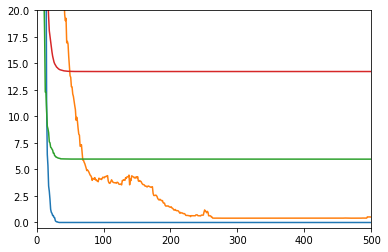

In [42]:
plt.plot(x[0])
plt.plot(x[1])

plt.plot(y[0])
plt.plot(y[1])

plt.xlim(0,500)
plt.ylim(-0.5,20)

(0, 200)

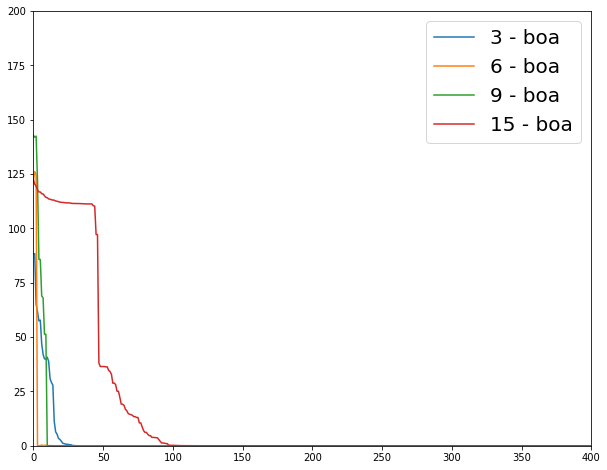

In [95]:
fs3 = get_data('Results/rastrigin_transposition_3.dat')
fs6 = get_data('Results/rastrigin_transposition_6.dat')
fs9 = get_data('Results/rastrigin_transposition_9.dat')
fs12 = get_data('Results/rastrigin_transposition_12.dat')
fs15 = get_data('Results/rastrigin_transposition_15.dat')
fs18 = get_data('Results/rastrigin_transposition_18.dat')

plt.rcParams["figure.figsize"] = (10,8)
plt.rc('legend',fontsize=20)

plt.plot(fs3[0], label='3 - boa')
#plt.plot(fs3[1], label='3 - ave')

plt.plot(fs6[0], label='6 - boa')
#plt.plot(fs6[1], label='6 - ave')

plt.plot(fs9[0], label='9 - boa')
#plt.plot(fs9[1], label='9 - ave')

plt.plot(fs15[0], label='15 - boa')
#plt.plot(fs15[1], label='15 - ave')


plt.legend()
plt.xlim(0,400)
plt.ylim(0,200)

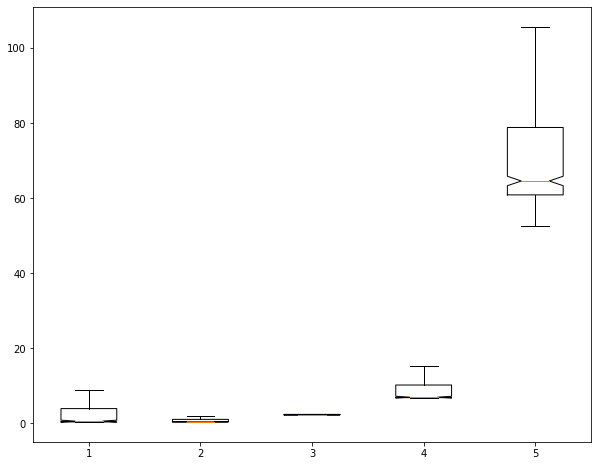

In [98]:
#plt.boxplot([fs3[0], fs6[0],fs9[0],fs12[0], fs15[0]], notch=True);
plt.boxplot([fs3[1], fs6[1], fs9[1], fs12[1], fs15[1]], notch=True, showfliers=False);
